In [2]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('netflix_titles.csv')

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.dropna(subset=['type','title','release_year','country','rating','duration'],inplace=True)

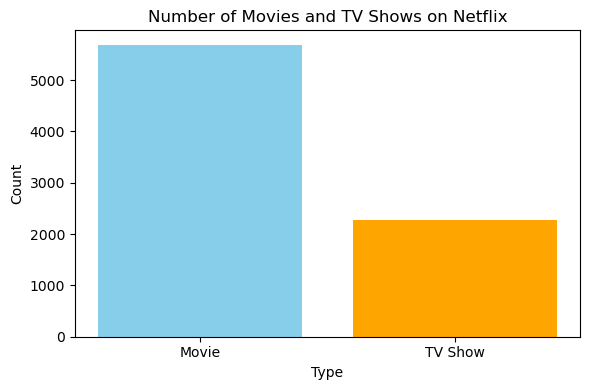

In [5]:
type_count=df['type'].value_counts()
plt.figure(figsize=[6,4])
plt.bar(type_count.index,type_count.values, color=['skyblue','orange'],label='Comparsion of Movie aand TV Shows')
plt.title('Number of Movies and TV Shows on Netflix')
plt.xlabel('Type')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('movie_vs_tvshows.png',dpi=300,bbox_inches='tight')
plt.show()

In [6]:
df.rating.unique()
df=df[~df.rating.isin(['74 min', '84 min', '66 min','nan'])]
df.rating.unique()

array(['PG-13', 'TV-MA', 'TV-14', 'TV-Y7', 'PG', 'R', 'TV-PG', 'TV-Y',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

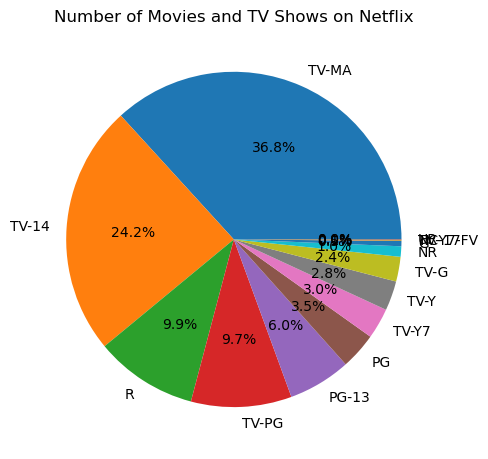

In [7]:
rating_count=df['rating'].value_counts()
plt.figure(figsize=[5,5])
plt.pie(rating_count.values,labels=rating_count.index,autopct='%1.1f%%')
plt.title('Number of Movies and TV Shows on Netflix')

plt.tight_layout()
plt.savefig('rating_piechart.png',dpi=300,bbox_inches='tight')
plt.show()

In [8]:
df_movie=df[df['type']=='Movie'].copy()
df_movie['duration_int']=df_movie['duration'].str.replace('min','').astype(int)


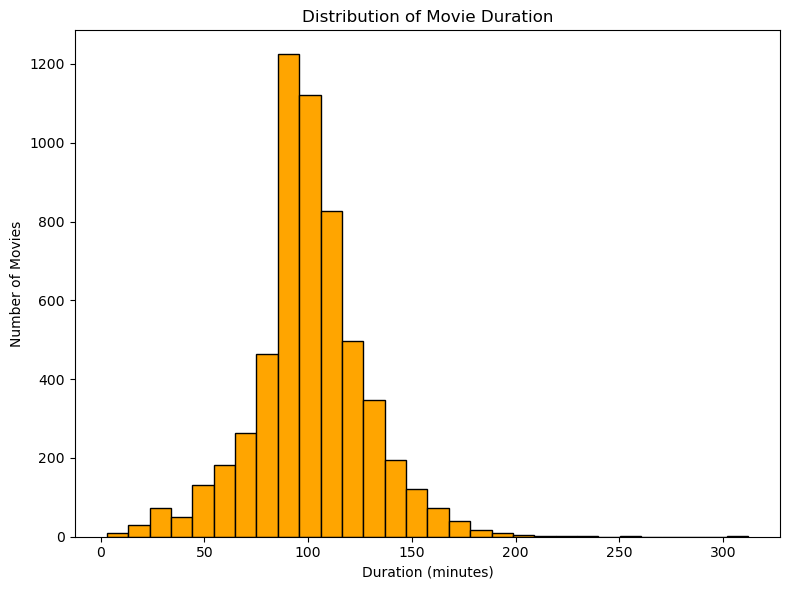

In [9]:
plt.figure(figsize=(8,6))
plt.hist(df_movie.duration_int,bins=30,color='orange',edgecolor='black')
plt.title('Distribution of Movie Duration')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.tight_layout()
plt.savefig('Movie_Distribution_Histogram.png',dpi=300,bbox_inches='tight')
plt.show()

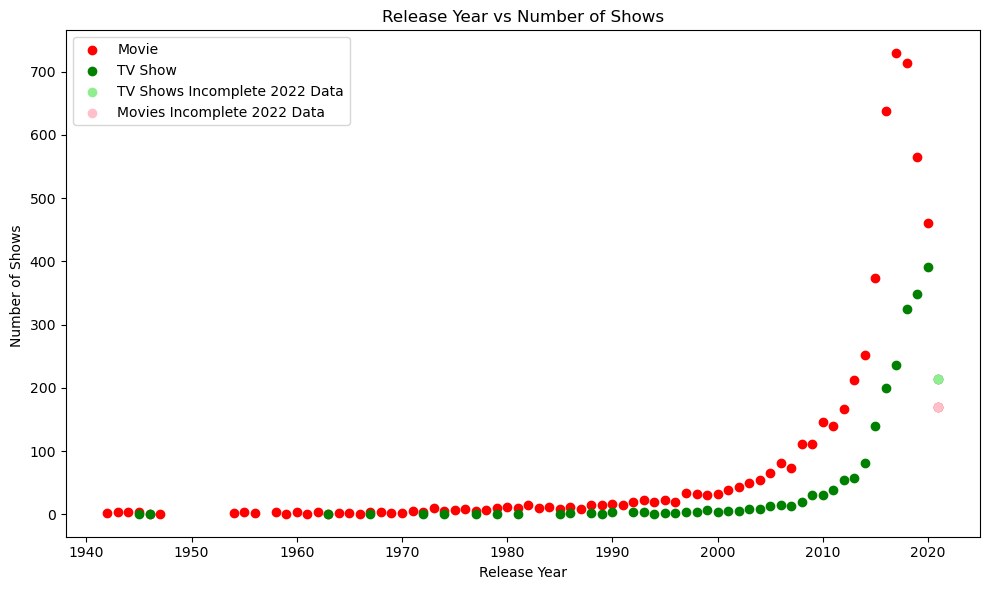

In [10]:
ryear_count_m=df_movie['release_year'].value_counts().sort_index()
plt.figure(figsize=(10,6))
plt.scatter(ryear_count_m.index,ryear_count_m.values,color='red',label='Movie')
df_TvShows=df[df['type']=='TV Show'].copy()
ryear_count_tv=df_TvShows['release_year'].value_counts().sort_index()
plt.scatter(ryear_count_tv.index,ryear_count_tv.values,color='green',label='TV Show')
plt.scatter(ryear_count_tv.index[-1], ryear_count_tv.values[-1], color='lightgreen', label='TV Shows Incomplete 2022 Data')
plt.scatter(ryear_count_m.index[-1], ryear_count_m.values[-1], color='pink', label='Movies Incomplete 2022 Data')
plt.xlabel('Release Year')
plt.ylabel('Number of Shows ')
plt.title('Release Year vs Number of Shows')
plt.legend()
plt.tight_layout()
plt.savefig('Relese_vs_number_of_shows.png')
plt.show()

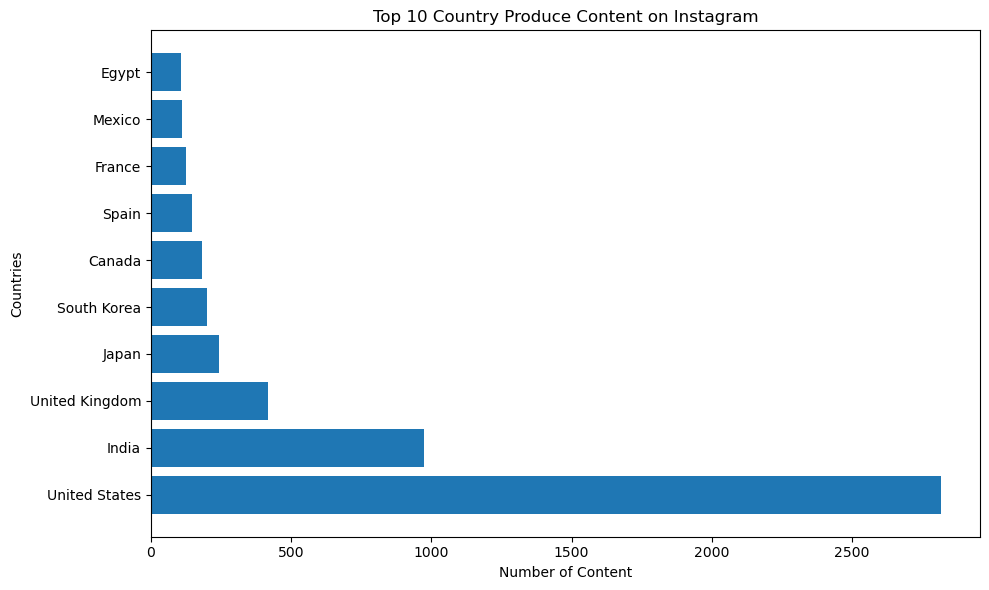

In [11]:
country_count=df.groupby('country')['country'].value_counts().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
plt.barh(country_count.index,country_count.values)
plt.title('Top 10 Country Produce Content on Instagram')
plt.xlabel('Number of Content')
plt.ylabel('Countries')
plt.tight_layout()
plt.savefig('Top_country_barh.png',dpi=300,bbox_inches='tight')

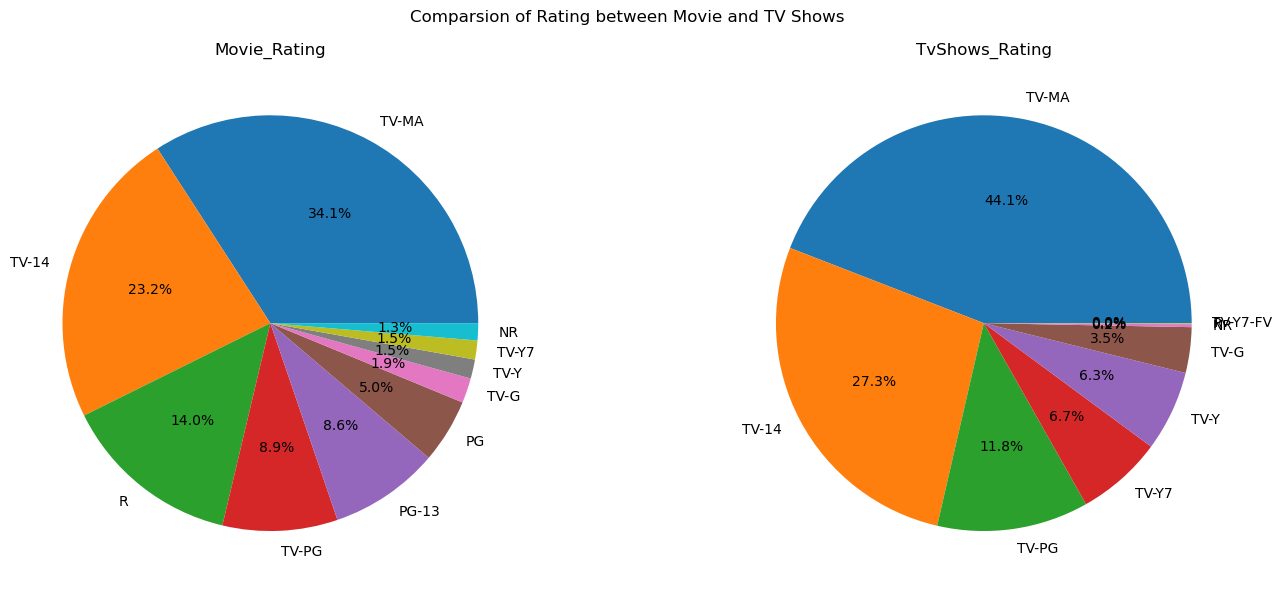

In [12]:
df_m_r=df_movie.groupby('rating')['rating'].value_counts().sort_values(ascending=False).head(10)
df_tv_r=df_TvShows.groupby('rating')['rating'].value_counts().sort_values(ascending=False).head(10)

fig,ax =plt.subplots(1,2, figsize=(15,6))
ax[0].pie(df_m_r.values,labels=df_m_r.index,autopct='%1.1f%%')
ax[0].set_title('Movie_Rating')
ax[1].pie(df_tv_r.values,labels=df_tv_r.index,autopct='%1.1f%%')
ax[1].set_title('TvShows_Rating')
plt.suptitle('Comparsion of Rating between Movie and TV Shows')
plt.tight_layout()
plt.savefig('Comparsion_rating.png',dpi=300,bbox_inches='tight')
plt.show()

In [14]:
df_m_r=df_movie.groupby('rating')['rating'].value_counts().sort_values(ascending=False).head(10)
df_tv_r=df_TvShows.groupby('rating')['rating'].value_counts().sort_values(ascending=False).head(10)
print(df_m_r)
print(df_tv_r)

rating
TV-MA    1924
TV-14    1307
R         787
TV-PG     504
PG-13     482
PG        281
TV-G      109
TV-Y       84
TV-Y7      83
NR         75
Name: count, dtype: int64
rating
TV-MA       1007
TV-14        623
TV-PG        269
TV-Y7        153
TV-Y         143
TV-G          81
NR             5
R              1
TV-Y7-FV       1
Name: count, dtype: int64
